In [24]:
import os
os.chdir("./..")
from src.utils.visualization import plot_overlapping
from src.utils.images import count_pixels

In [25]:
import pandas as pd
import glob
import cv2 as cv2

In [34]:
def dice_score_from_numpy(gt, seg):
    gt = gt.astype(float)
    seg = seg.astype(float)
    
    tp = np.sum(np.logical_and(seg, gt)).astype(float)
    tn = np.sum(np.logical_and(np.logical_not(seg), gt)).astype(float)
    fp = np.sum(np.logical_and(seg, np.logical_not(gt))).astype(float)
    fn = np.sum(np.logical_and(np.logical_not(seg), gt)).astype(float)

    if np.sum(gt) == 0:
        dice = 1 if np.sum(seg) == 0 else 0
    else:
        dice = 2 * tp / (2 * tp + fp + fn)

    return dice

In [56]:
def postprocess_binary_segmentation(segmentation, threshold):
    """
    OLD FUNCTION
    It replaced the pixels from minority class to majority class.

    """
    segmentation_postprocessed = segmentation.copy()

    counter = count_pixels(segmentation)
    tumor_pixels = counter.get(255, 0)
    
    if tumor_pixels <= threshold:
        segmentation_postprocessed[segmentation_postprocessed == 1] = 0
        segmentation_postprocessed[segmentation_postprocessed == 255] = 0

    return segmentation_postprocessed


In [26]:
root = "/home/carlos/Documentos/proyectos/breast_cancer/Results/Experiments/new_oversamples_3/20231112_063342_Multi_FSB_BTS_UNet_new_24_alpha_0.85_batch_2_benign_malignant_normal"


In [37]:
def load_class_results(path):
    results = []

    for fold in range(0, 4):
        df = pd.read_csv(f"{path}/fold_{fold}/results_classification.csv")
#         df = df.drop(columns=['patient_id'])
        df["fold"] = fold
        results.append(df)

    results = pd.concat(results)
    return results

def load_seg_results(path):
    results = []

    for fold in range(0, 4):
        df = pd.read_csv(f"{path}/fold_{fold}/results_segmentation.csv")
        df = df.drop(columns=['patient_id'])
        df["fold"] = fold
        results.append(df)

    results = pd.concat(results)
    return results

In [38]:
cls = load_class_results(root)
segs = load_seg_results(path)

In [32]:
benign_seg_paths = sorted(glob.glob(f"{root}/fold*/segs/benign_*.png"))
malignant_seg_paths = sorted(glob.glob(f"{root}/fold*/segs/malignant_*.png"))
normal_seg_paths = sorted(glob.glob(f"{root}/fold*/segs/normal_*.png"))

images_path = "./Datasets/Dataset_BUSI_with_GT_postprocessed_128_uniques/images"
masks_path = "./Datasets/Dataset_BUSI_with_GT_postprocessed_128_uniques/masks"

2

Patient: 101	DICE: Class predicted: 2		 1		 0 pixeles labelled


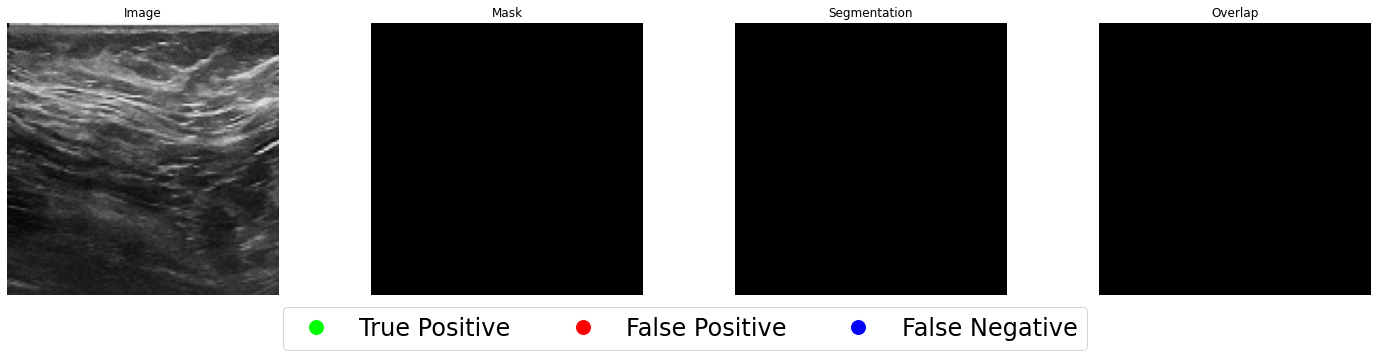

Patient: 103	DICE: Class predicted: 2		 1		 0 pixeles labelled


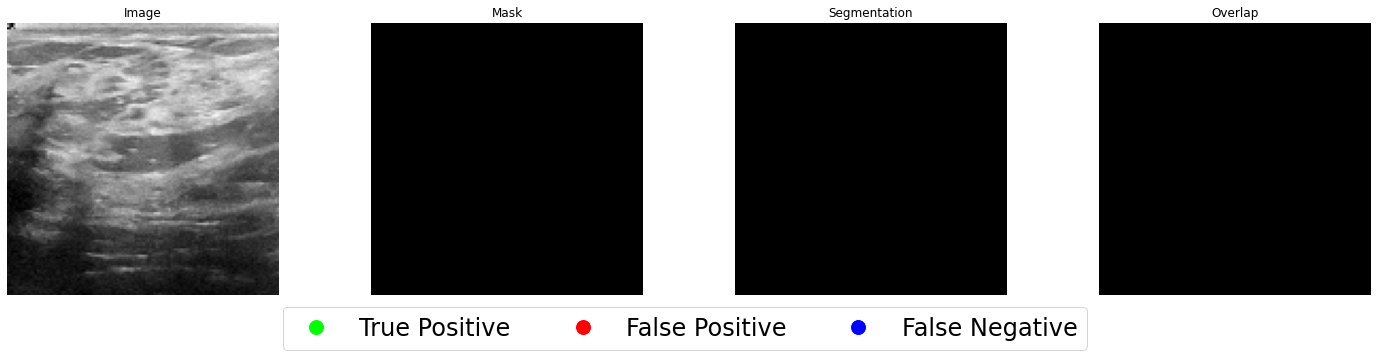

Patient: 105	DICE: Class predicted: 0		 1		 0 pixeles labelled


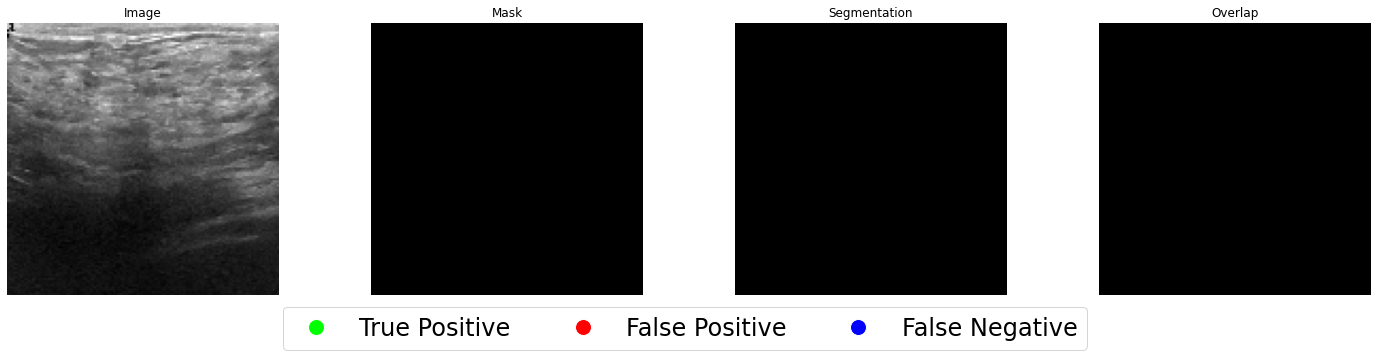

Patient: 16	DICE: Class predicted: 0		 1		 0 pixeles labelled


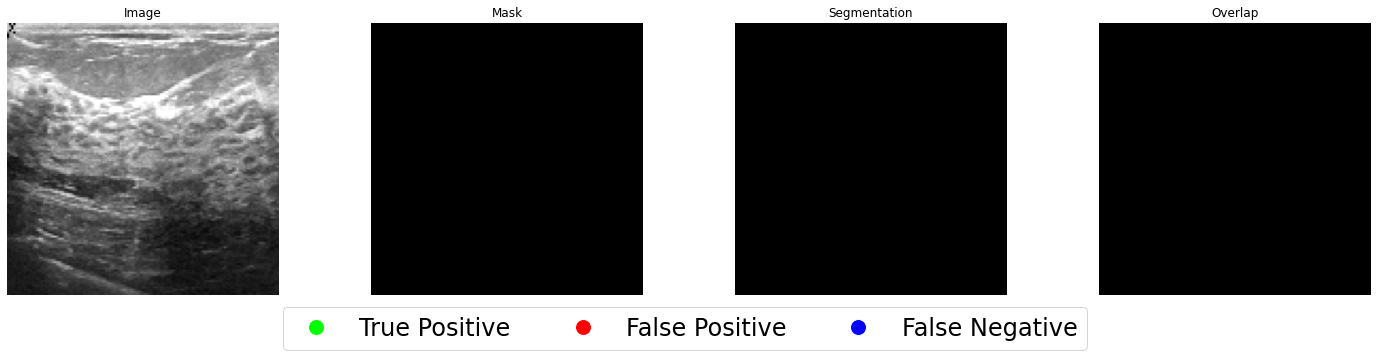

Patient: 18	DICE: Class predicted: 2		 1		 0 pixeles labelled


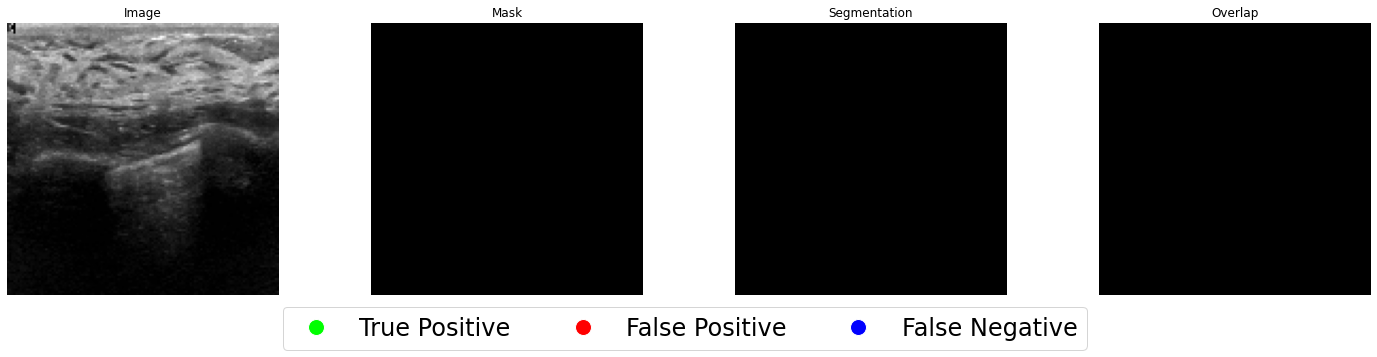

Patient: 75	DICE: Class predicted: 0		 1		 1 pixeles labelled


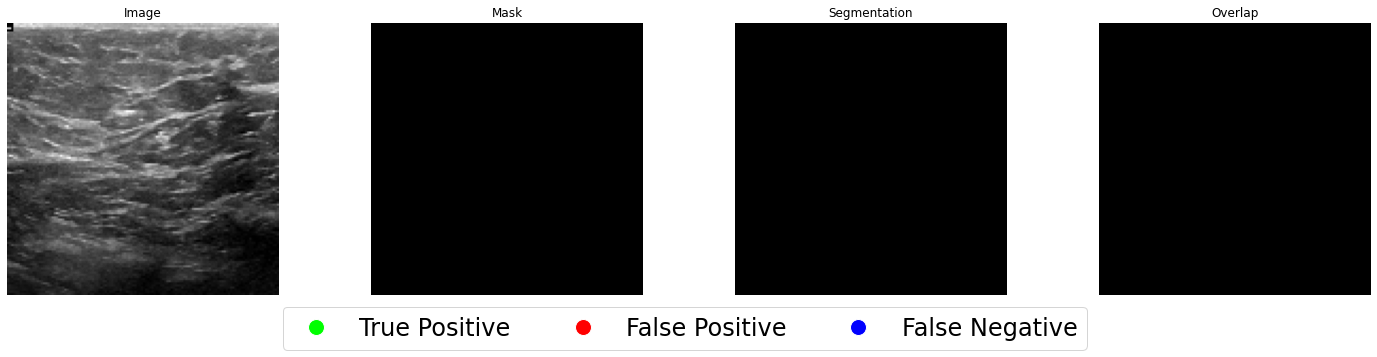

Patient: 77	DICE: Class predicted: 2		 1		 0 pixeles labelled


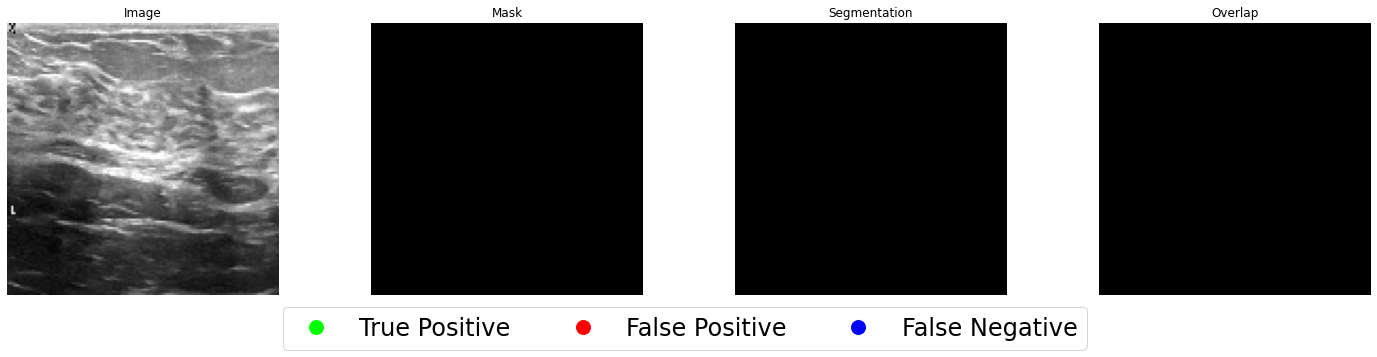

Patient: 79	DICE: Class predicted: 2		 1		 0 pixeles labelled


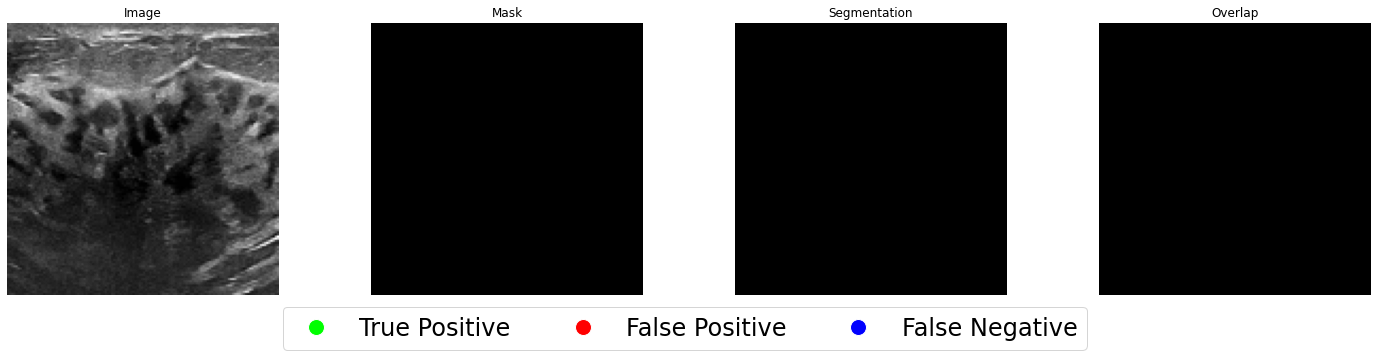

Patient: 80	DICE: Class predicted: 2		 1		 0 pixeles labelled


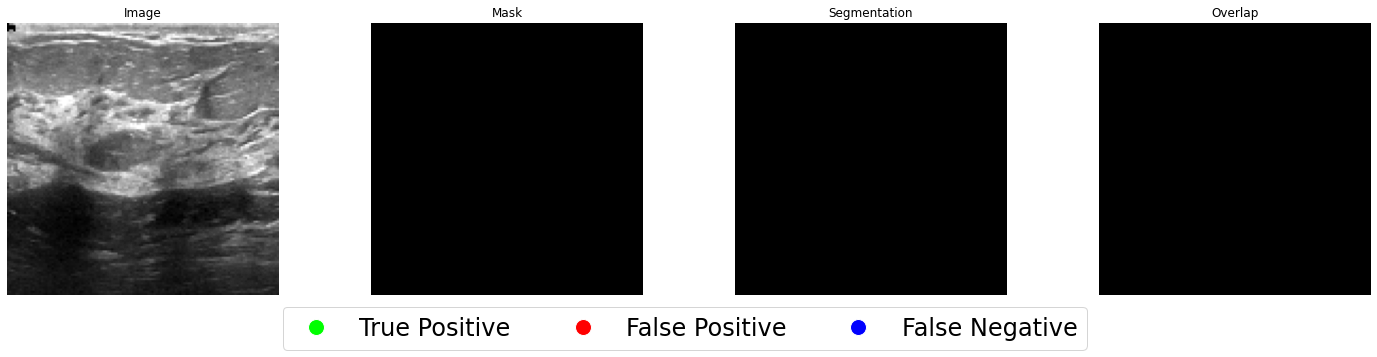

Patient: 82	DICE: Class predicted: 2		 1		 0 pixeles labelled


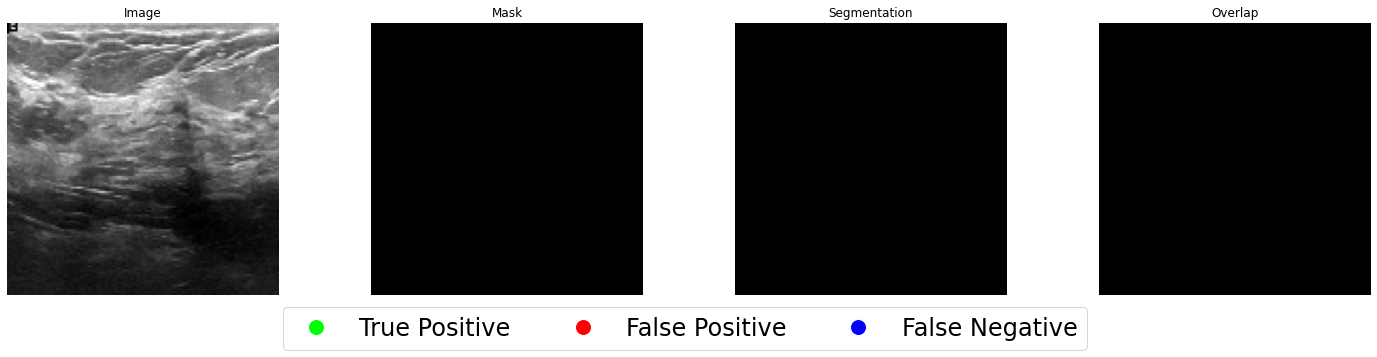

Patient: 83	DICE: Class predicted: 2		 1		 0 pixeles labelled


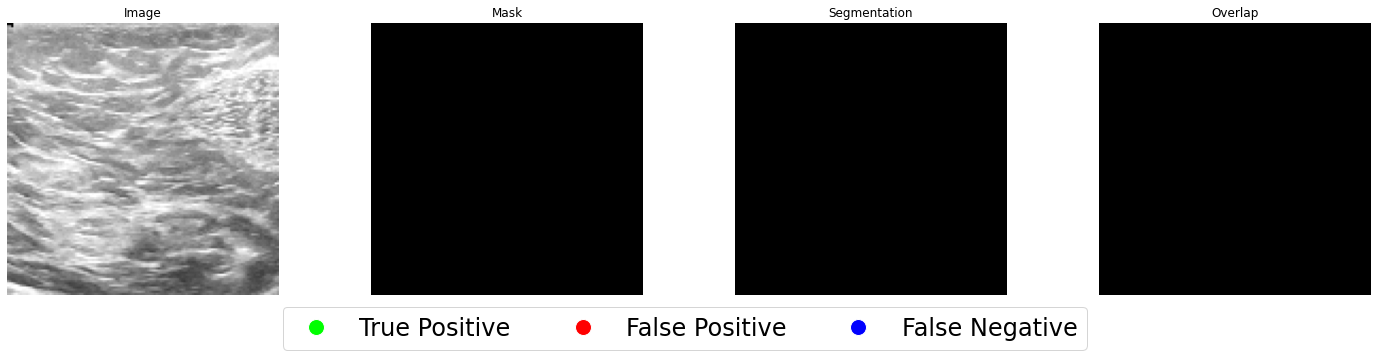

Patient: 85	DICE: Class predicted: 2		 1		 0 pixeles labelled


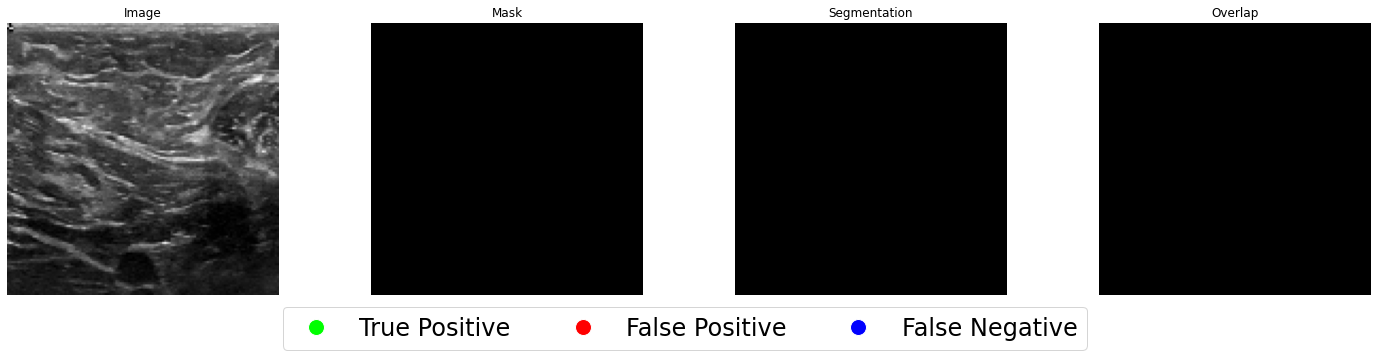

Patient: 88	DICE: Class predicted: 2		 1		 0 pixeles labelled


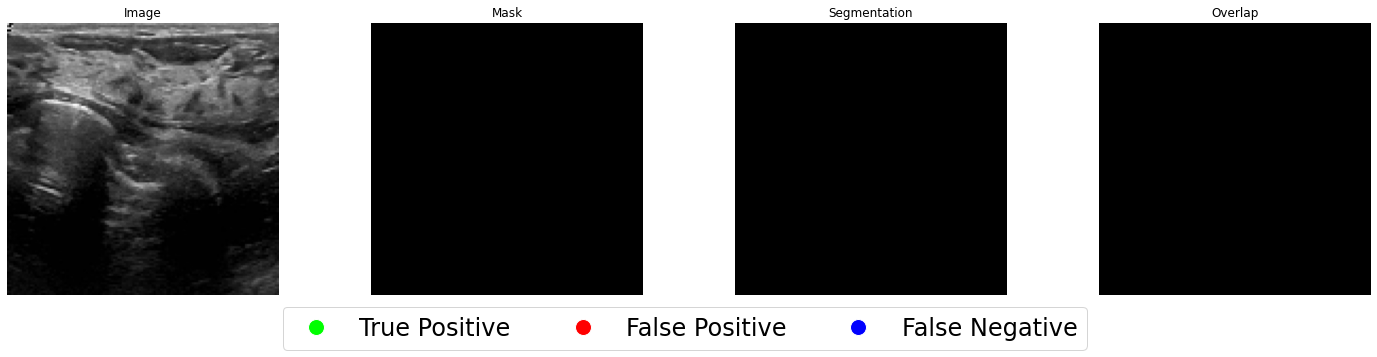

Patient: 8	DICE: Class predicted: 2		 1		 0 pixeles labelled


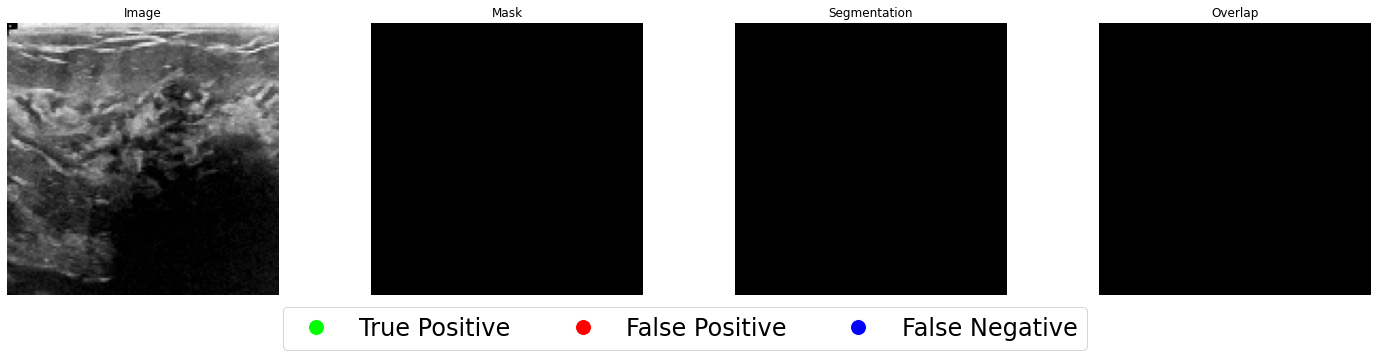

Patient: 94	DICE: Class predicted: 2		 1		 0 pixeles labelled


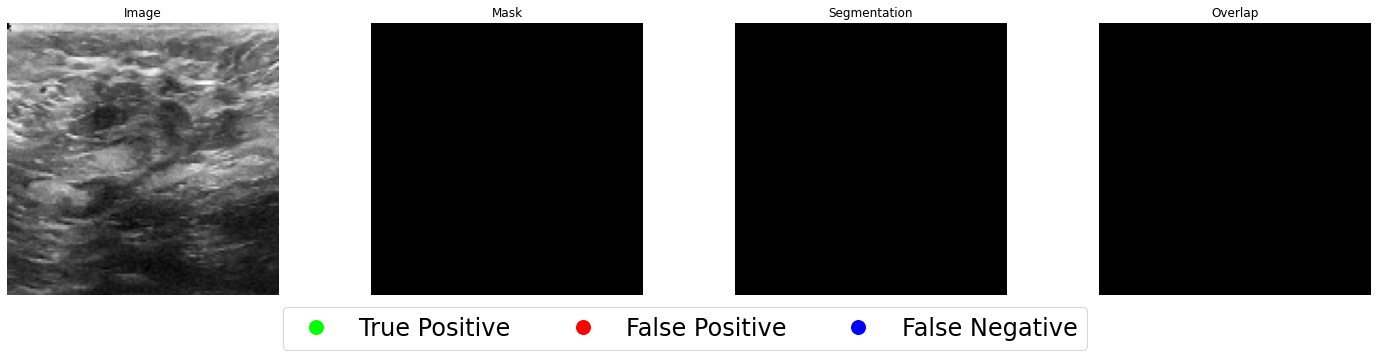

Patient: 99	DICE: Class predicted: 2		 1		 0 pixeles labelled


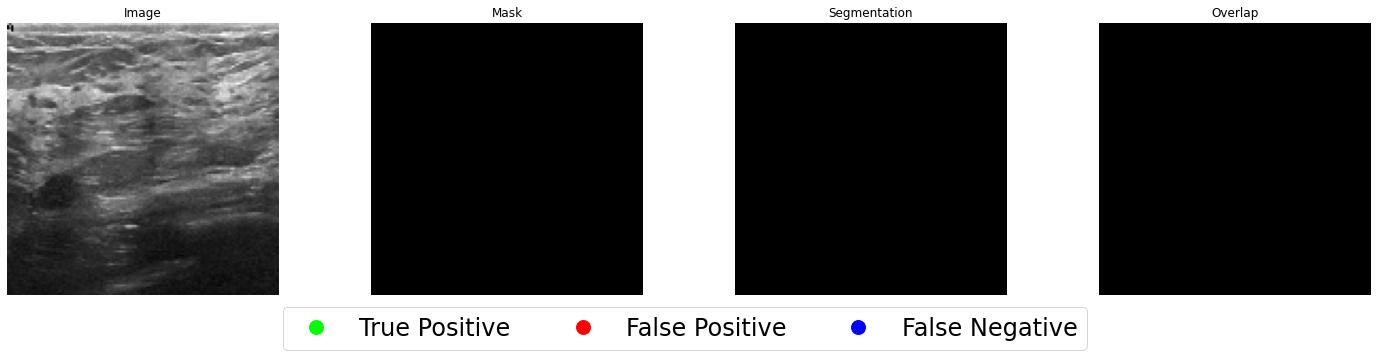

Patient: 100	DICE: Class predicted: 2		 1		 0 pixeles labelled


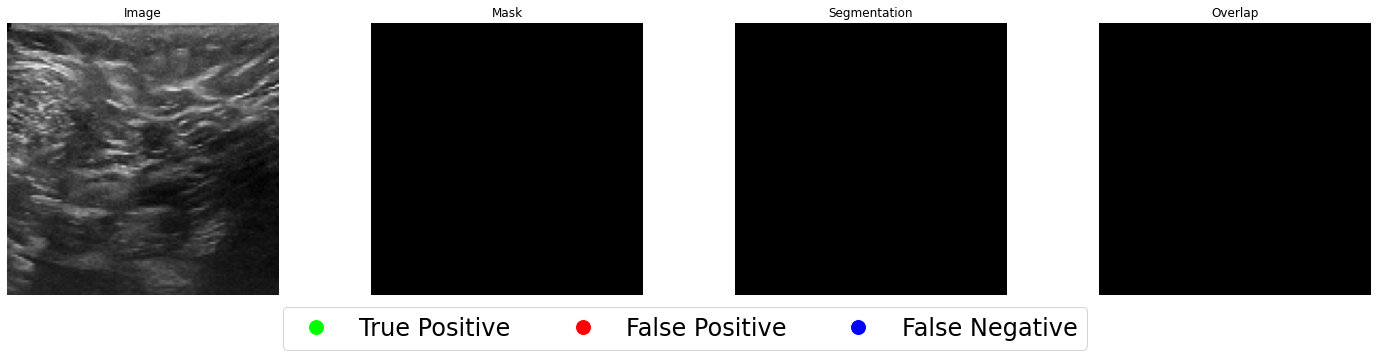

Patient: 102	DICE: Class predicted: 2		 1		 0 pixeles labelled


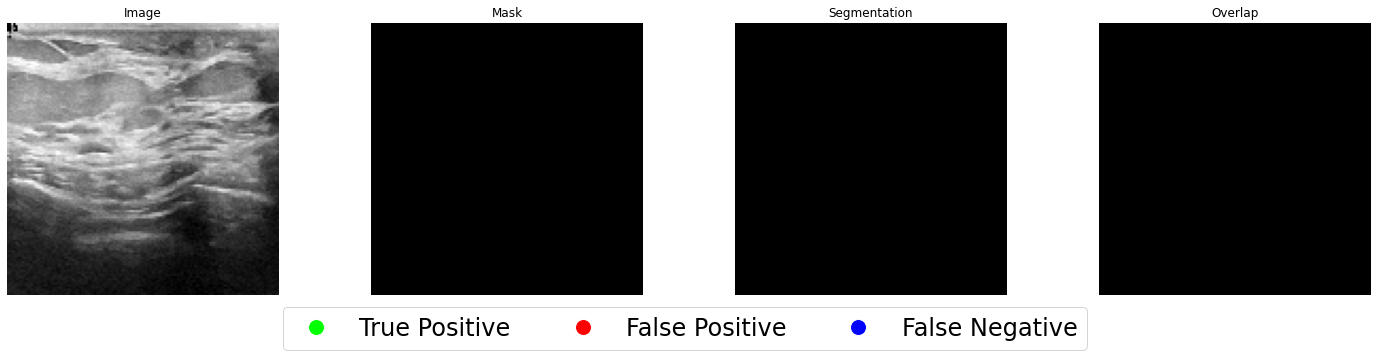

Patient: 110	DICE: Class predicted: 2		 1		 0 pixeles labelled


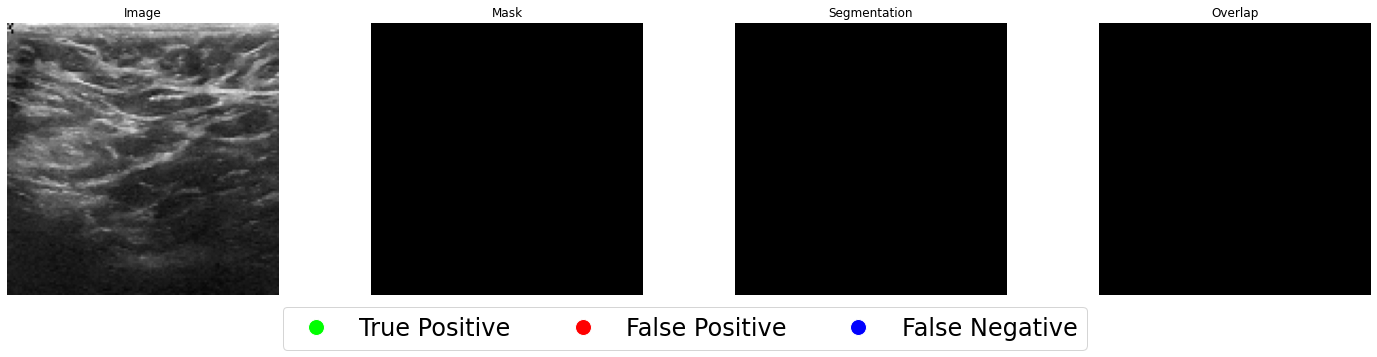

Patient: 111	DICE: Class predicted: 2		 1		 8 pixeles labelled


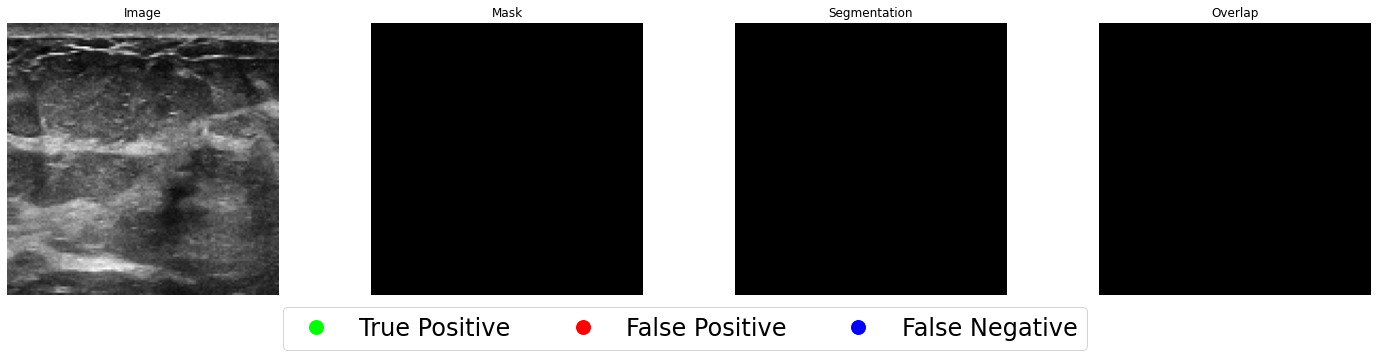

Patient: 118	DICE: Class predicted: 2		 0		 158 pixeles labelled


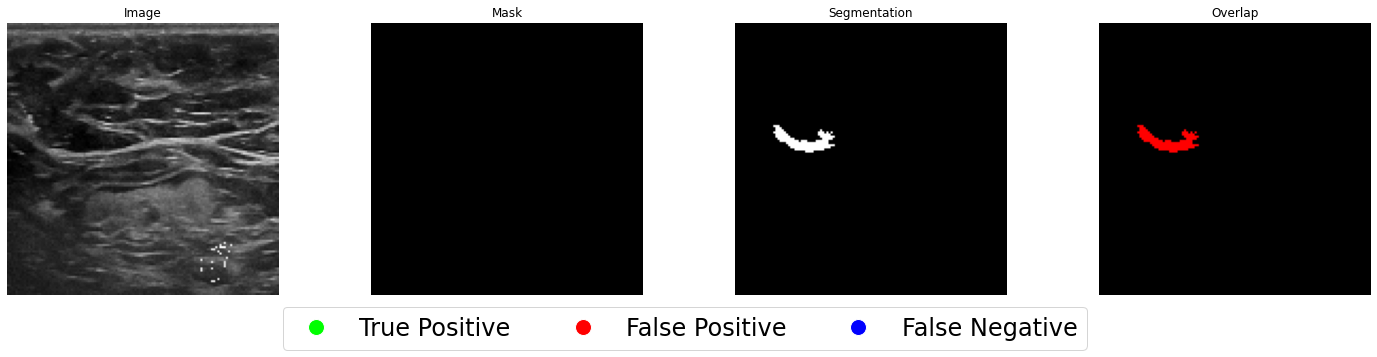

Patient: 11	DICE: Class predicted: 2		 1		 0 pixeles labelled


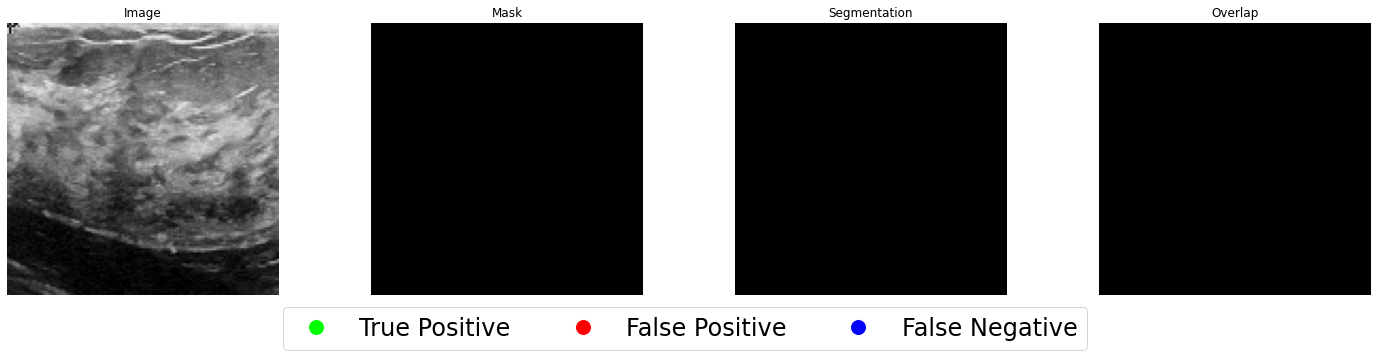

Patient: 12	DICE: Class predicted: 2		 1		 0 pixeles labelled


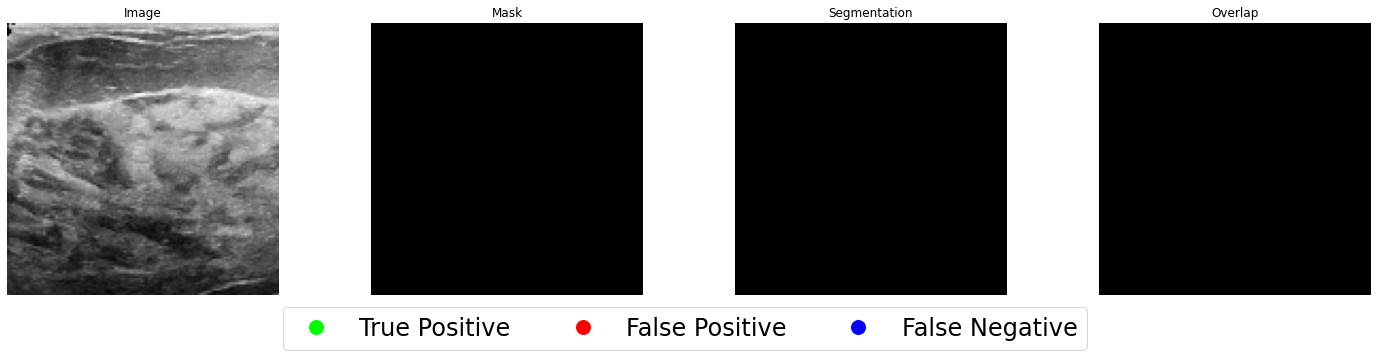

Patient: 2	DICE: Class predicted: 2		 1		 0 pixeles labelled


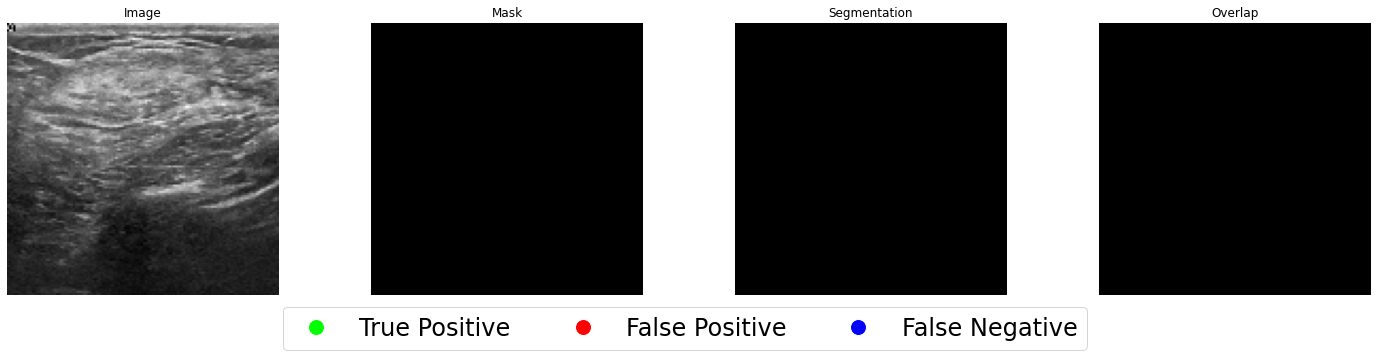

Patient: 37	DICE: Class predicted: 2		 1		 0 pixeles labelled


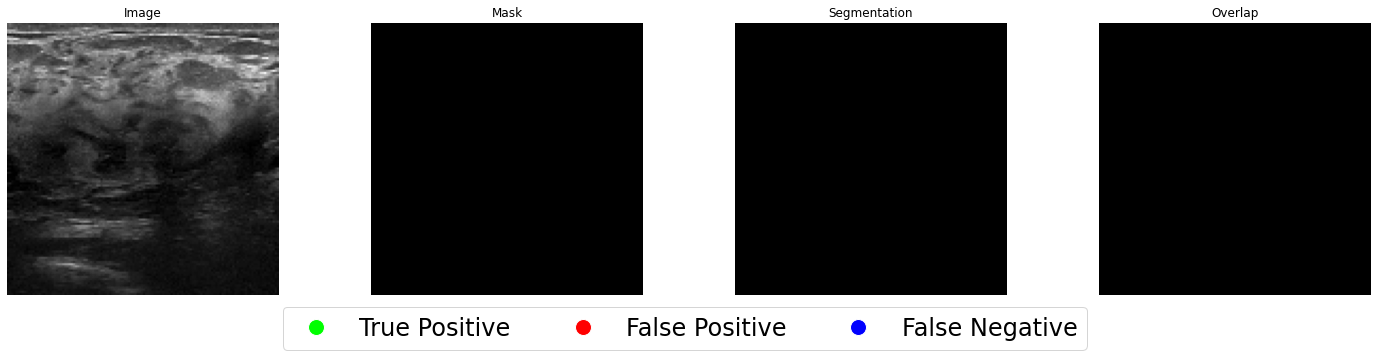

Patient: 3	DICE: Class predicted: 1		 0		 879 pixeles labelled


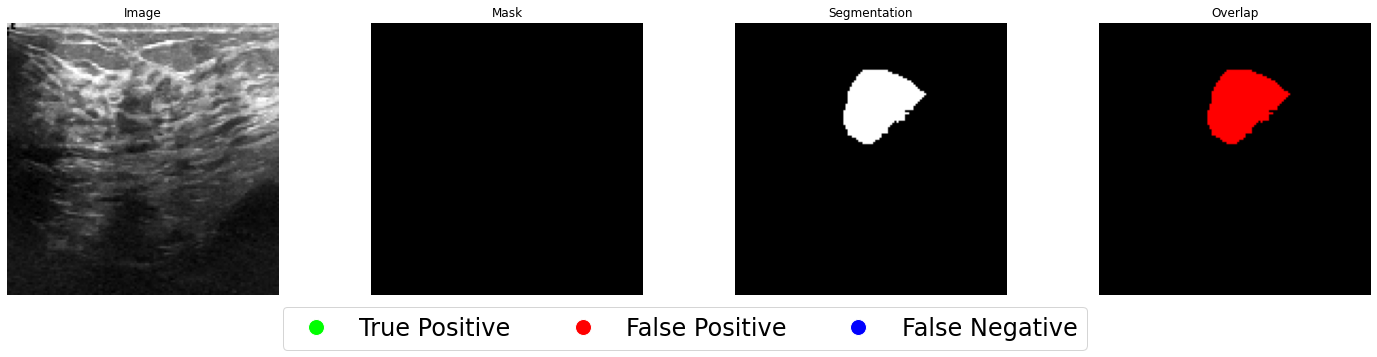

Patient: 4	DICE: Class predicted: 2		 1		 0 pixeles labelled


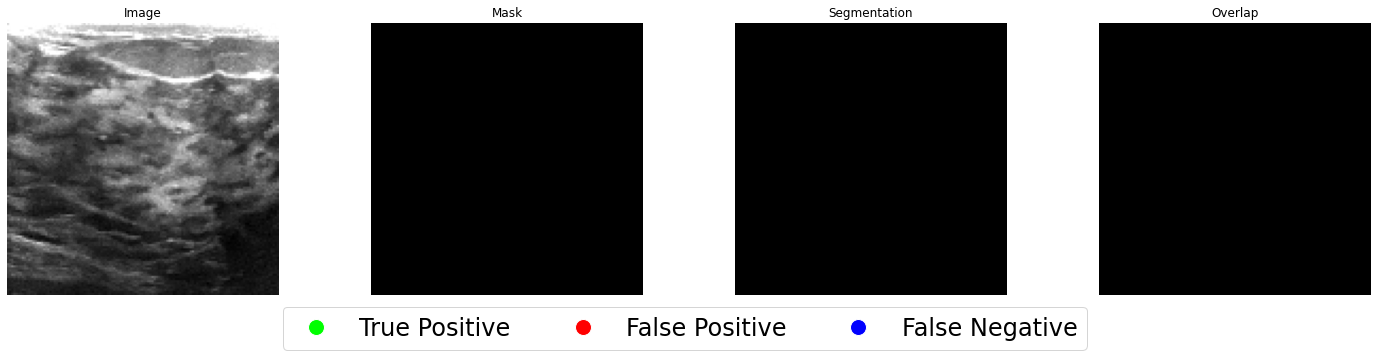

Patient: 74	DICE: Class predicted: 2		 1		 0 pixeles labelled


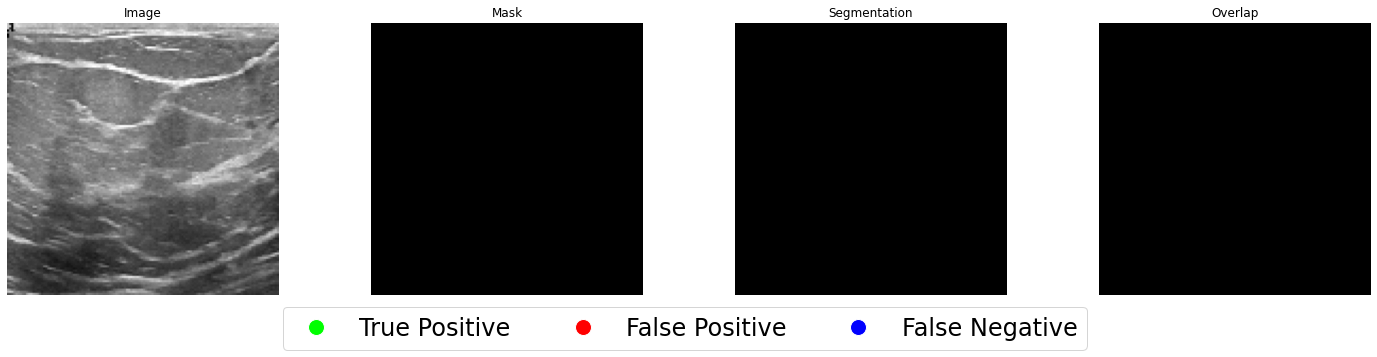

Patient: 7	DICE: Class predicted: 2		 1		 0 pixeles labelled


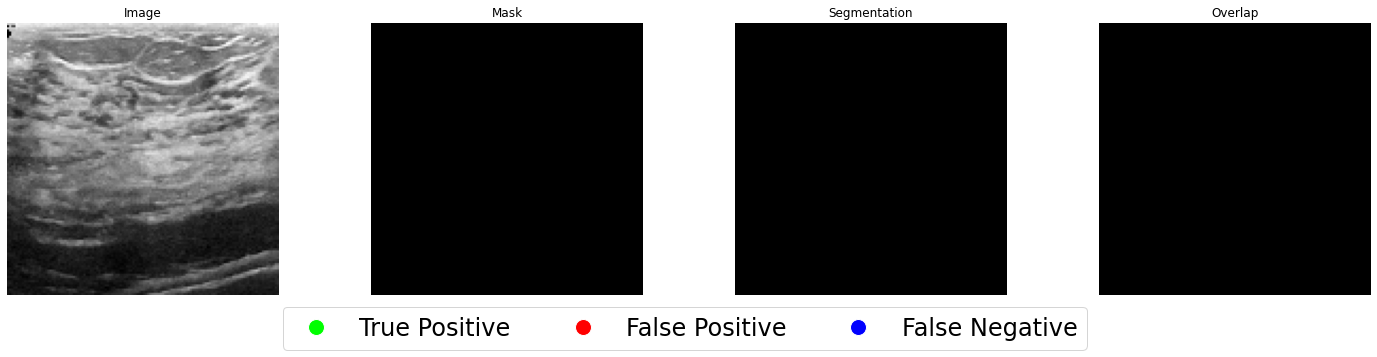

Patient: 84	DICE: Class predicted: 2		 1		 0 pixeles labelled


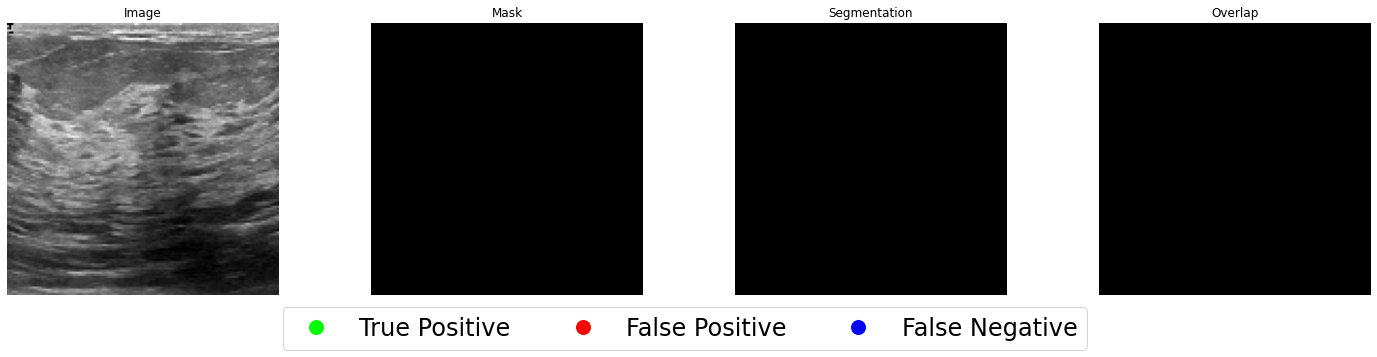

Patient: 86	DICE: Class predicted: 2		 1		 0 pixeles labelled


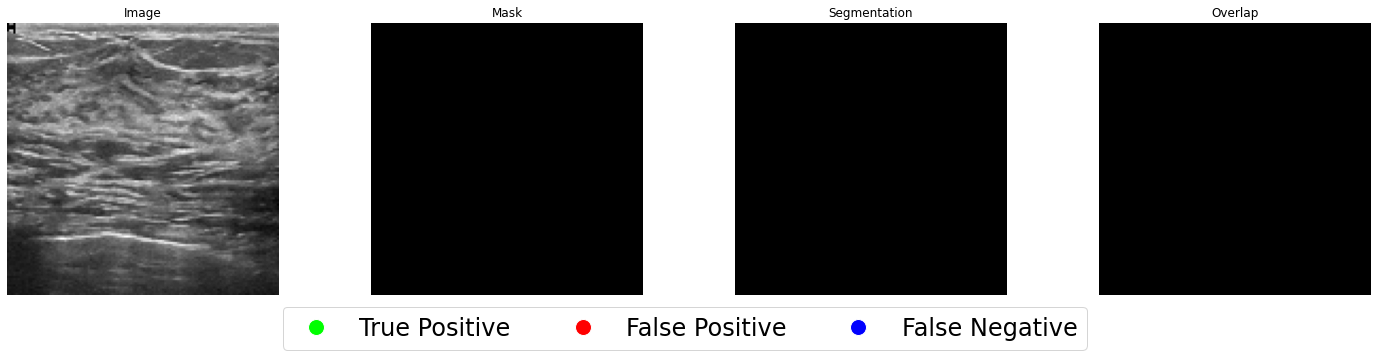

Patient: 93	DICE: Class predicted: 2		 1		 0 pixeles labelled


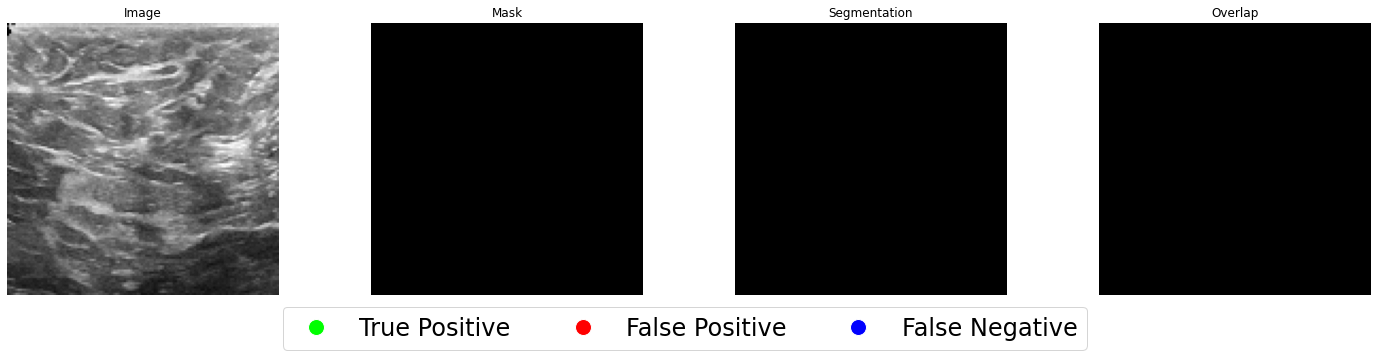

Patient: 106	DICE: Class predicted: 2		 0		 1692 pixeles labelled


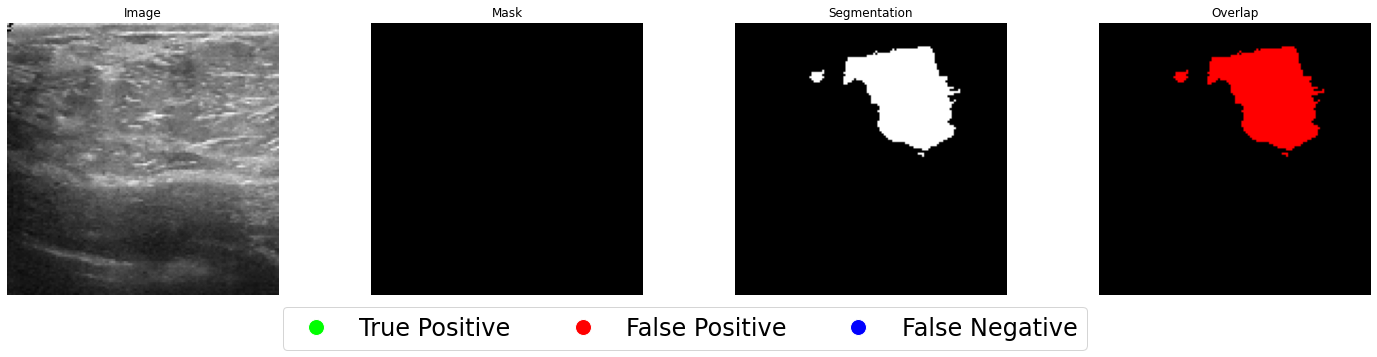

Patient: 116	DICE: Class predicted: 2		 0		 2958 pixeles labelled


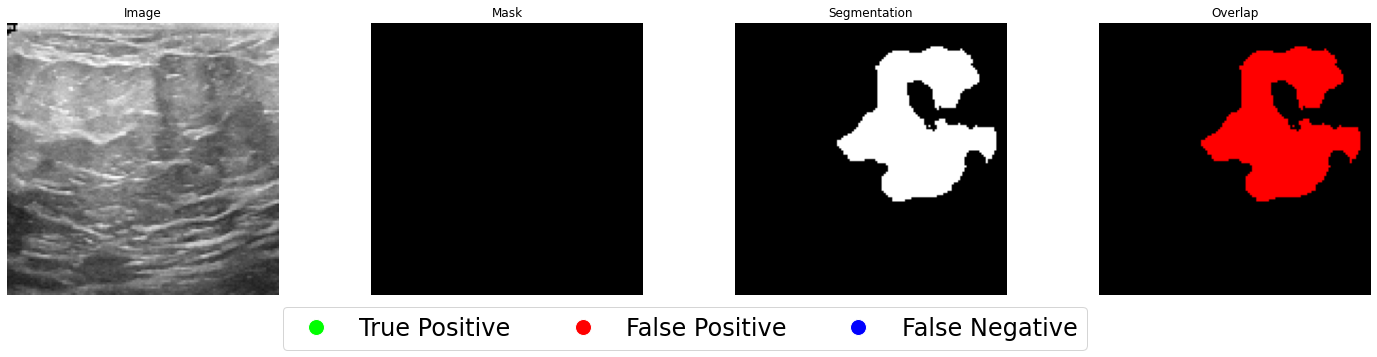

Patient: 117	DICE: Class predicted: 1		 0		 3296 pixeles labelled


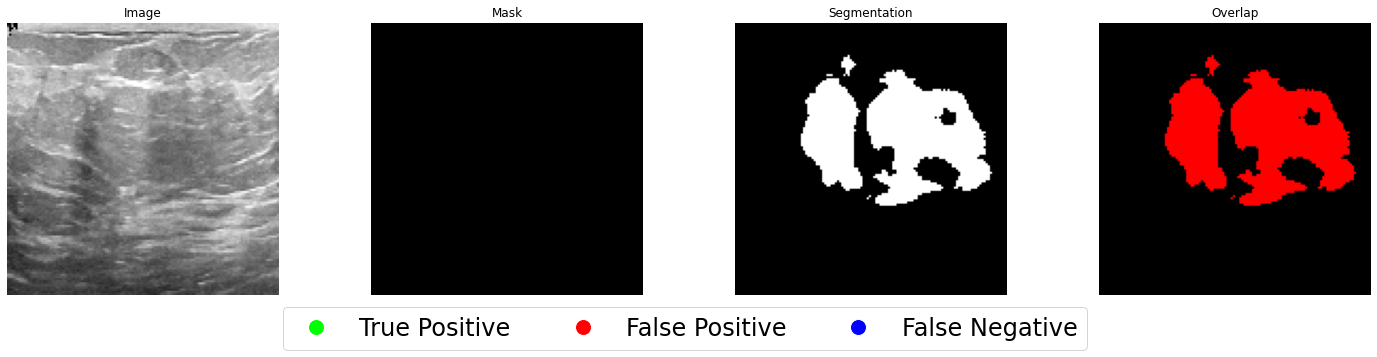

Patient: 133	DICE: Class predicted: 2		 0		 2023 pixeles labelled


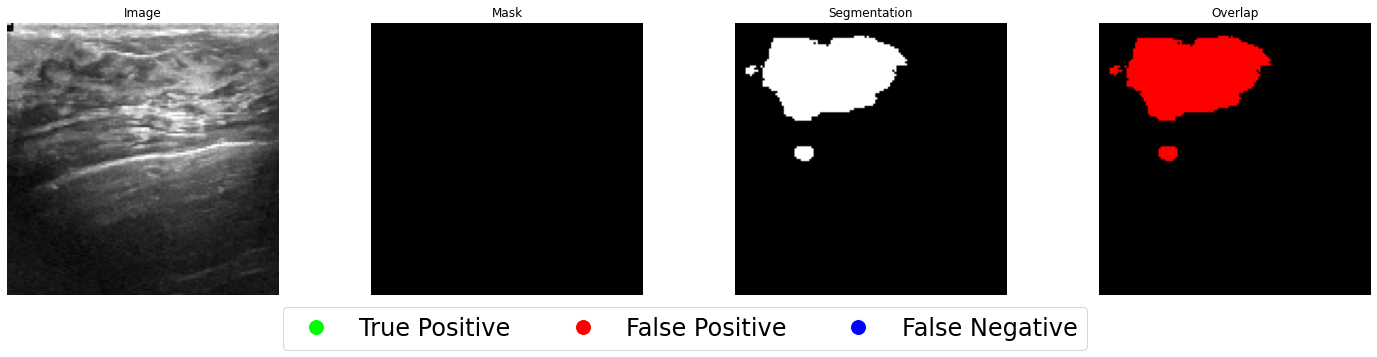

Patient: 36	DICE: Class predicted: 1		 0		 2990 pixeles labelled


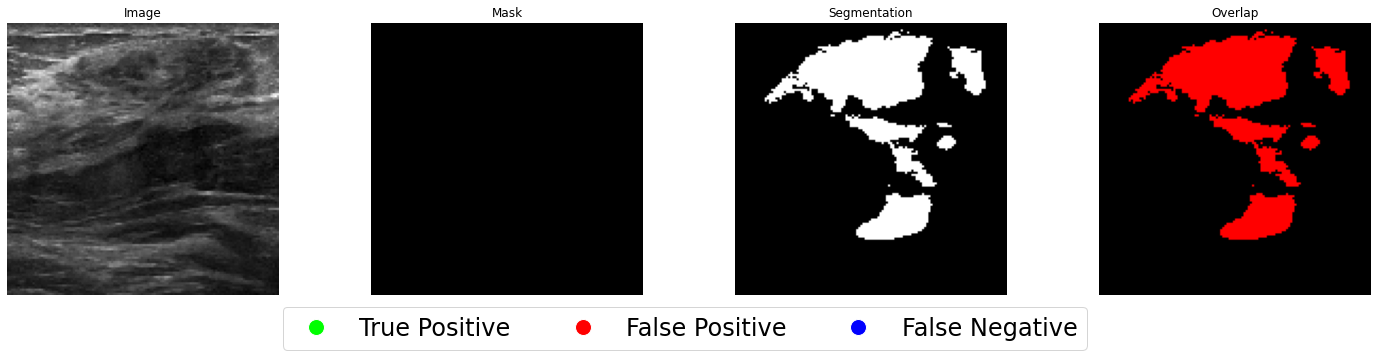

Patient: 6	DICE: Class predicted: 2		 0		 844 pixeles labelled


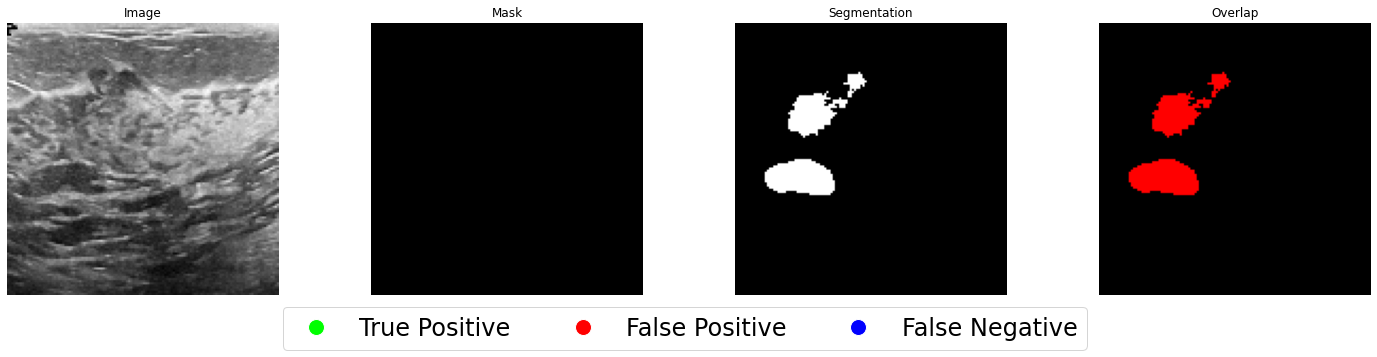

Patient: 70	DICE: Class predicted: 2		 0		 3383 pixeles labelled


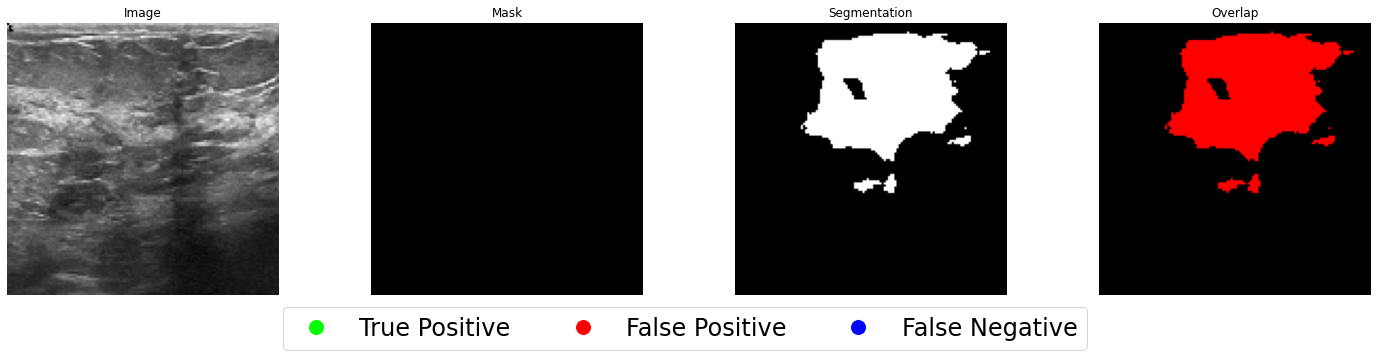

Patient: 73	DICE: Class predicted: 2		 0		 1291 pixeles labelled


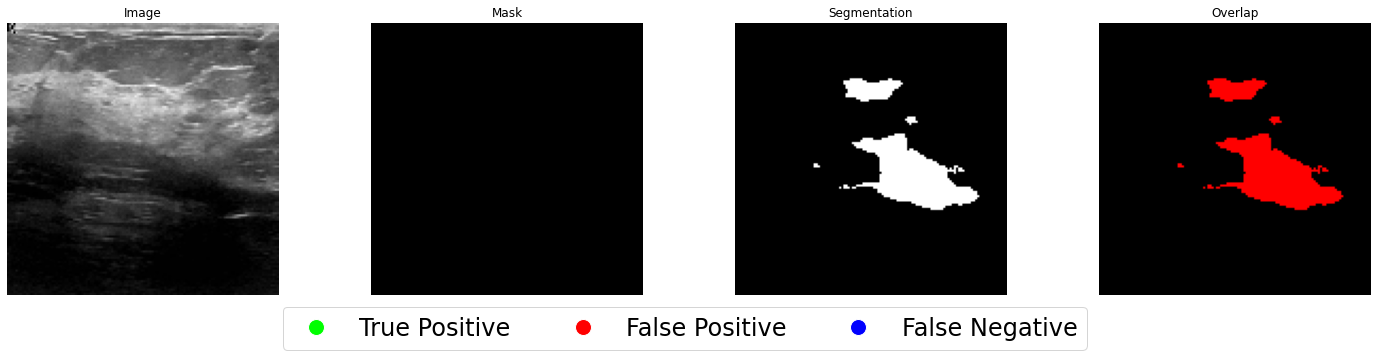

Patient: 76	DICE: Class predicted: 2		 0		 2472 pixeles labelled


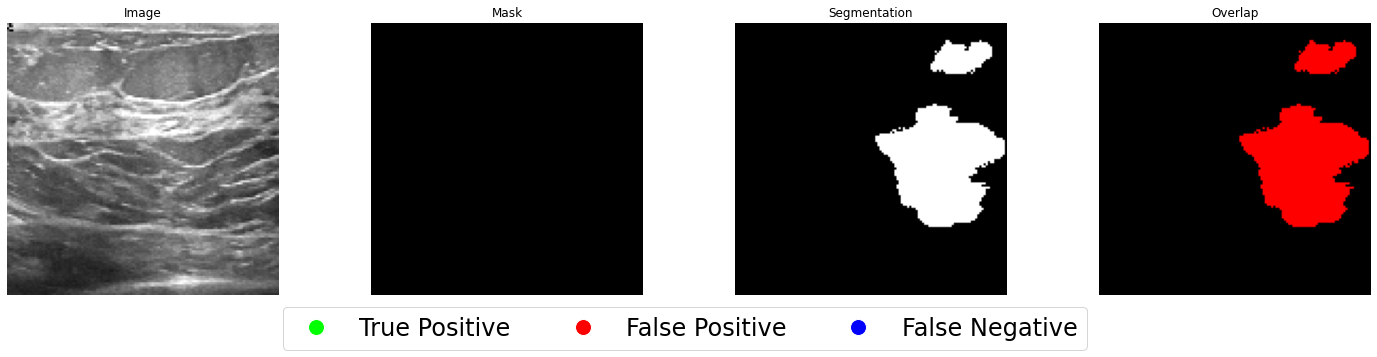

Patient: 78	DICE: Class predicted: 2		 0		 2472 pixeles labelled


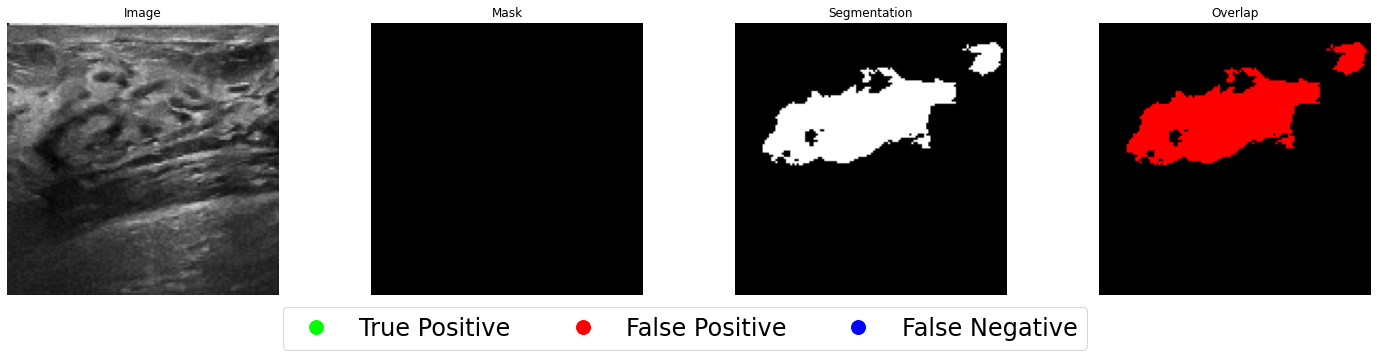

Patient: 89	DICE: Class predicted: 2		 0		 1358 pixeles labelled


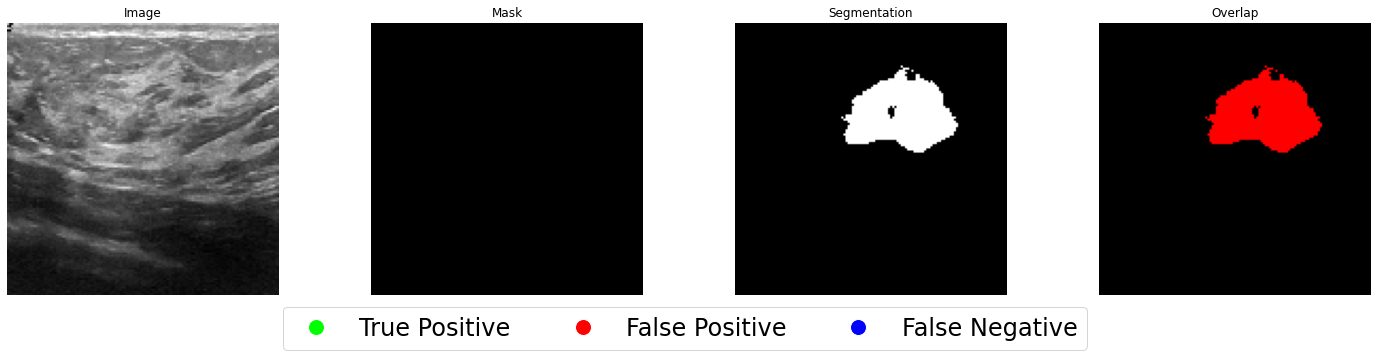

Patient: 90	DICE: Class predicted: 2		 0		 1048 pixeles labelled


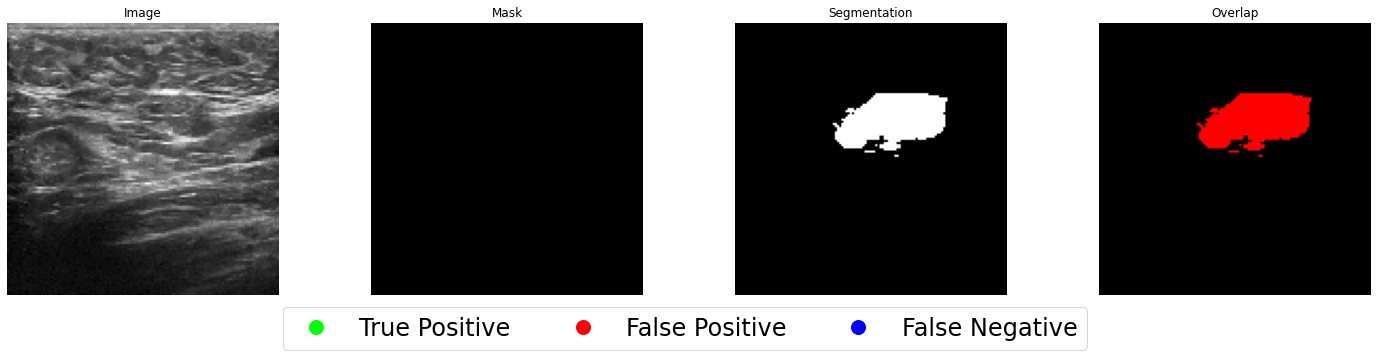

Patient: 92	DICE: Class predicted: 2		 0		 1300 pixeles labelled


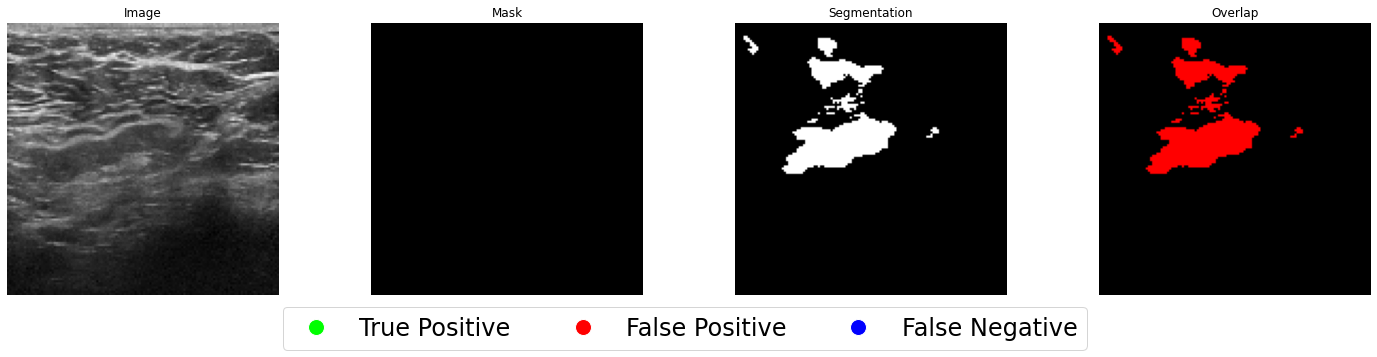

Patient: 95	DICE: Class predicted: 2		 0		 925 pixeles labelled


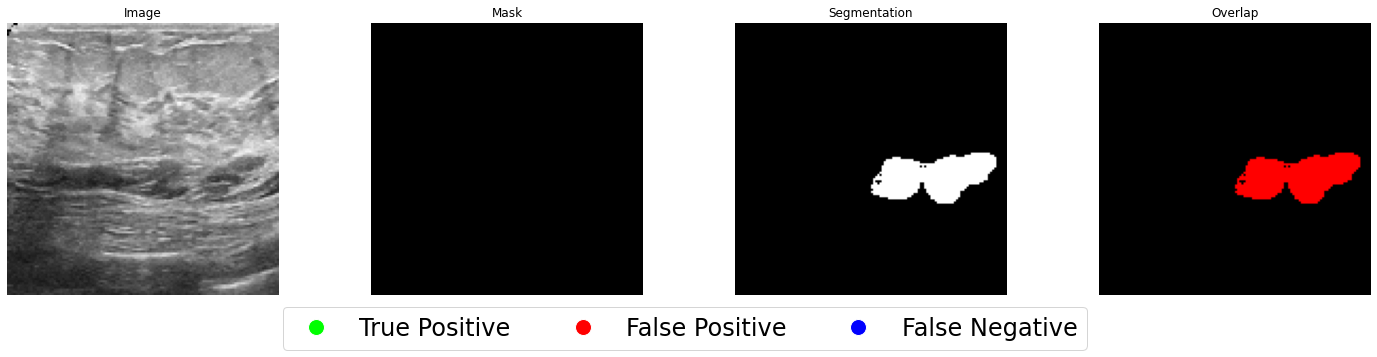

Patient: 96	DICE: Class predicted: 2		 0		 1510 pixeles labelled


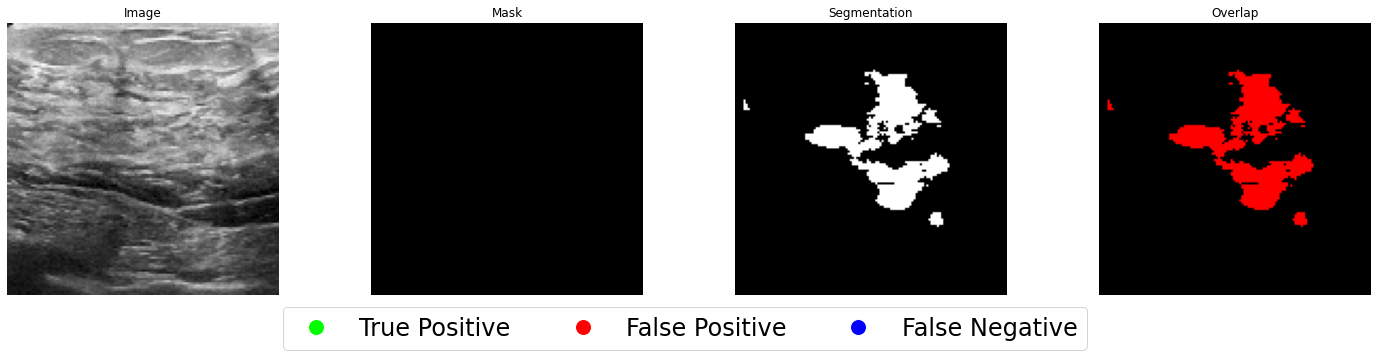

Patient: 9	DICE: Class predicted: 2		 0		 1485 pixeles labelled


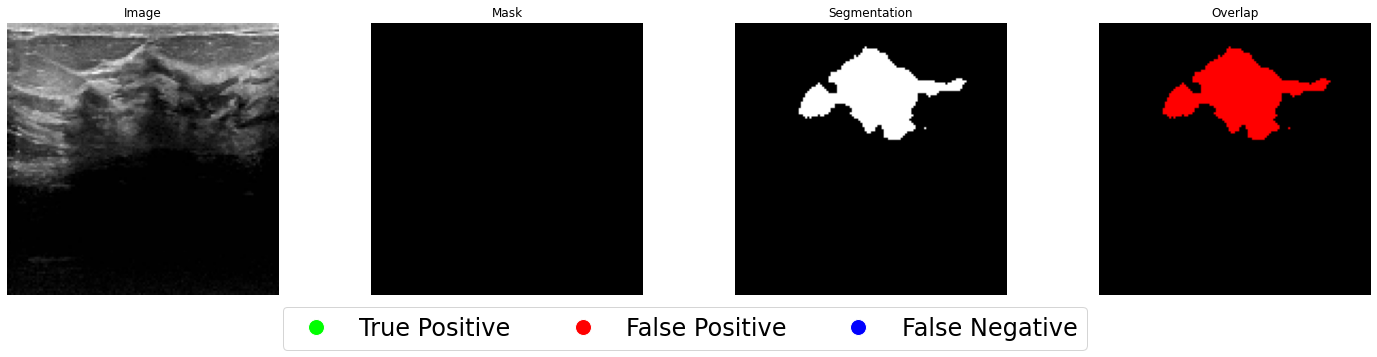

Patient: 108	DICE: Class predicted: 1		 0		 748 pixeles labelled


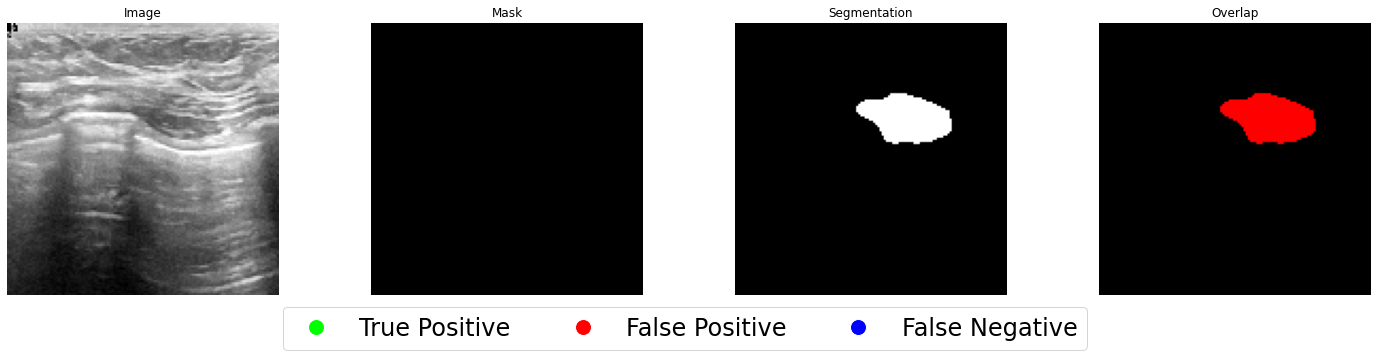

Patient: 109	DICE: Class predicted: 2		 1		 0 pixeles labelled


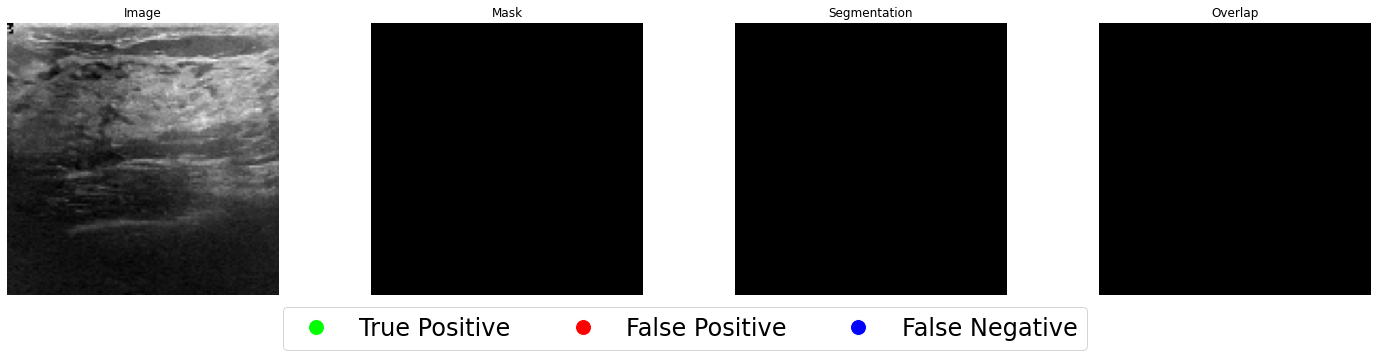

Patient: 10	DICE: Class predicted: 2		 0		 1725 pixeles labelled


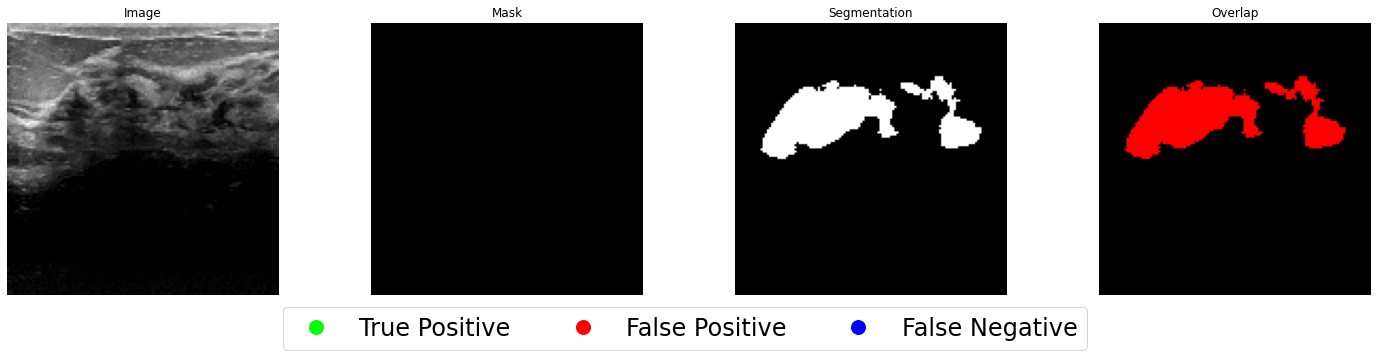

Patient: 112	DICE: Class predicted: 1		 0		 1041 pixeles labelled


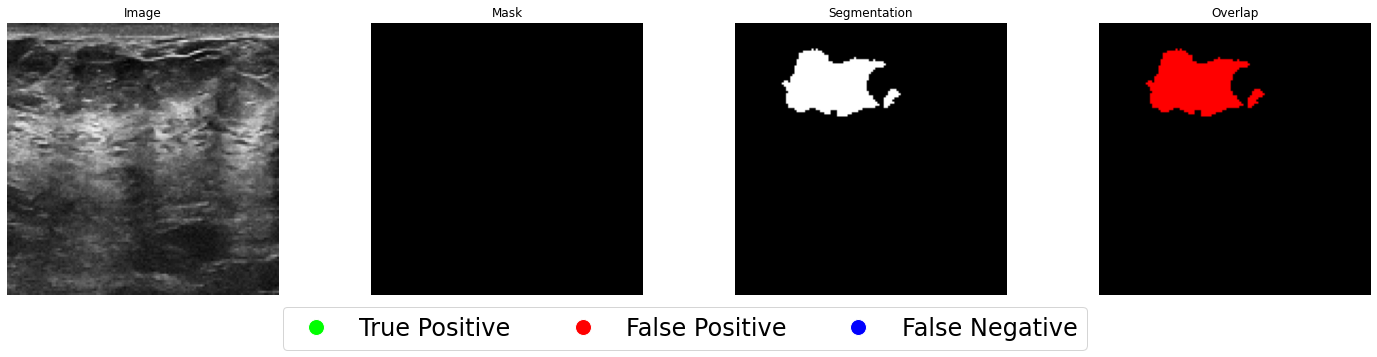

Patient: 113	DICE: Class predicted: 1		 0		 2301 pixeles labelled


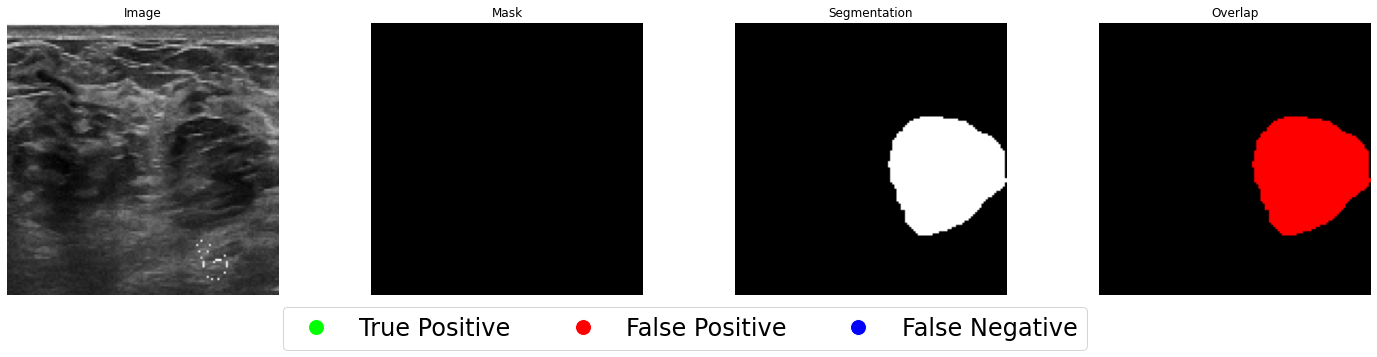

Patient: 114	DICE: Class predicted: 2		 1		 0 pixeles labelled


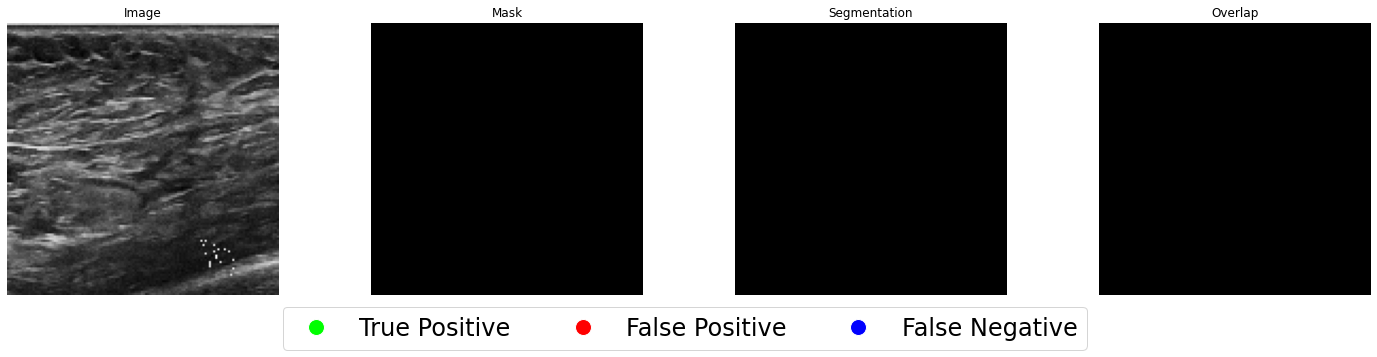

Patient: 115	DICE: Class predicted: 2		 0		 469 pixeles labelled


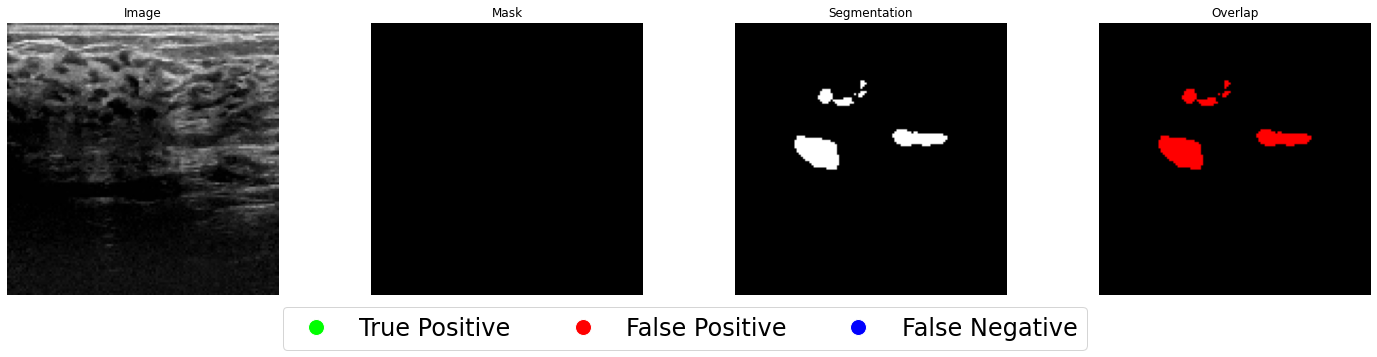

Patient: 14	DICE: Class predicted: 0		 0		 282 pixeles labelled


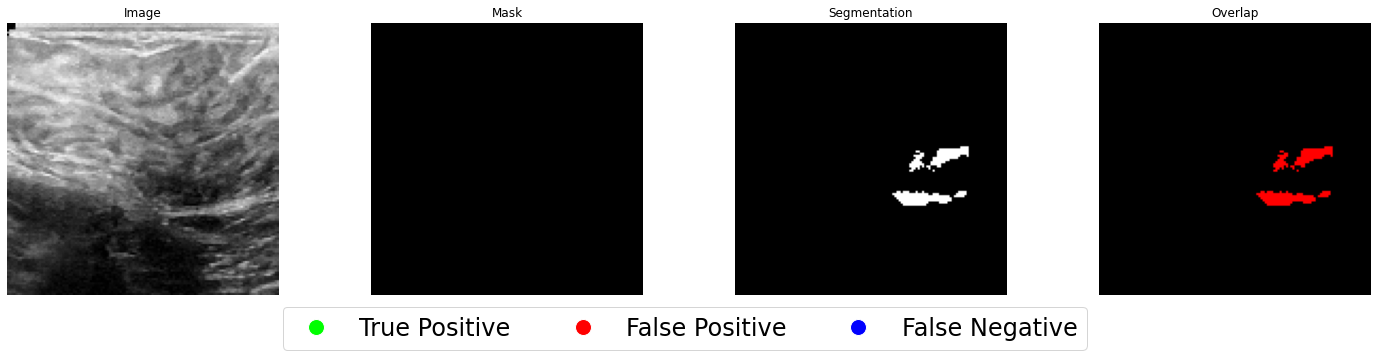

Patient: 15	DICE: Class predicted: 0		 1		 0 pixeles labelled


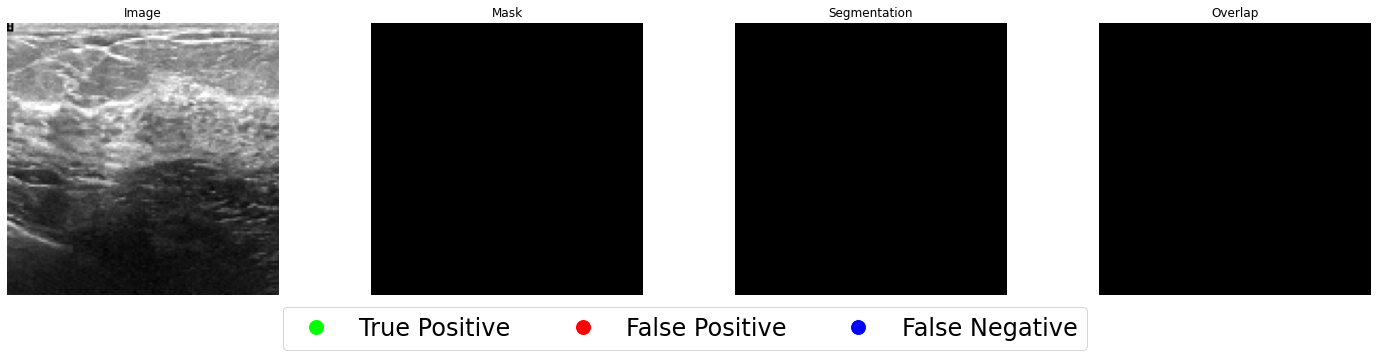

Patient: 17	DICE: Class predicted: 2		 0		 1159 pixeles labelled


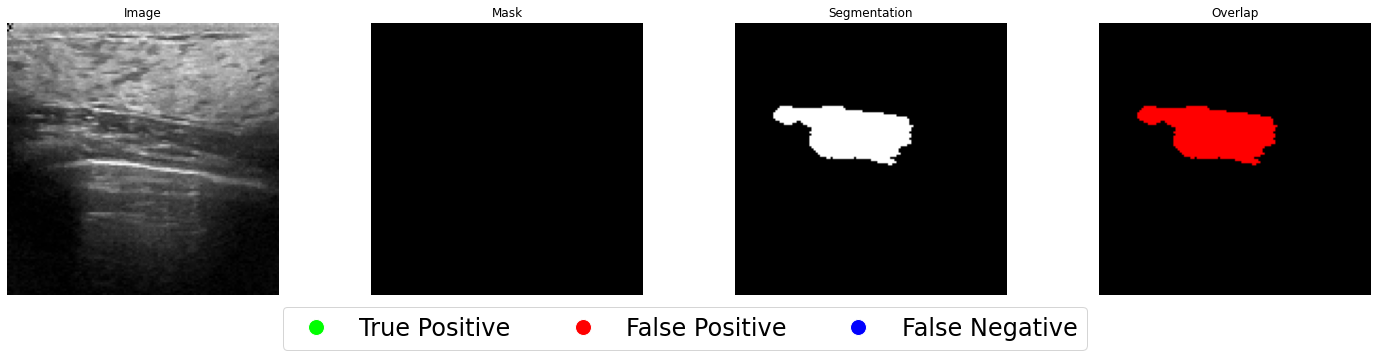

Patient: 65	DICE: Class predicted: 0		 1		 0 pixeles labelled


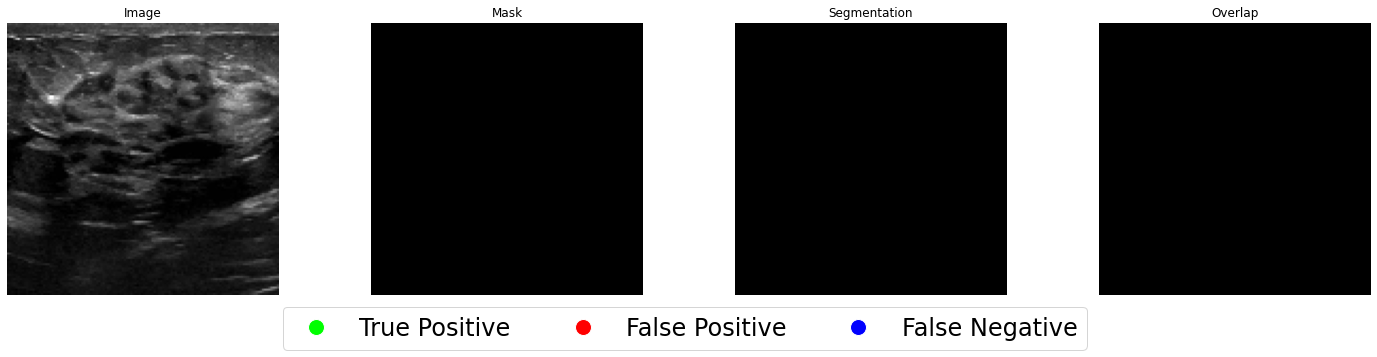

Patient: 66	DICE: Class predicted: 0		 0		 404 pixeles labelled


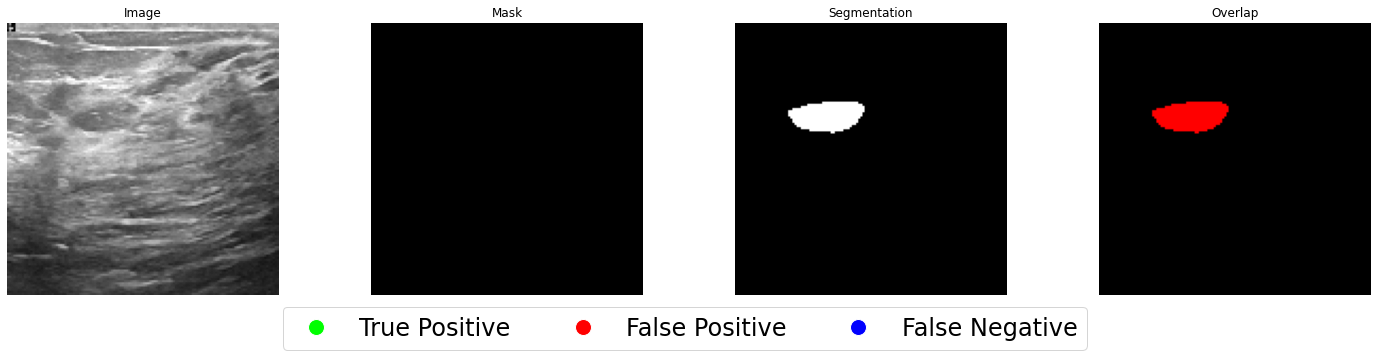

Patient: 71	DICE: Class predicted: 0		 0		 1073 pixeles labelled


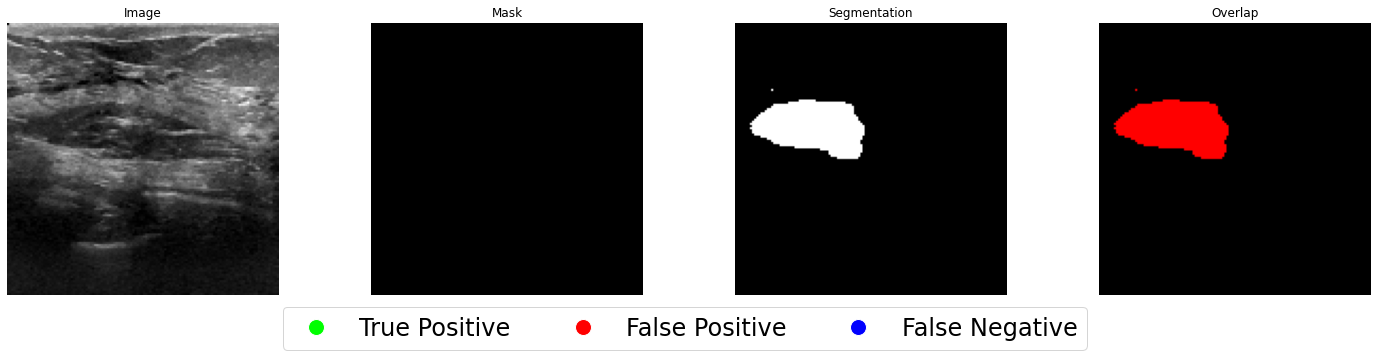

Patient: 72	DICE: Class predicted: 2		 0		 284 pixeles labelled


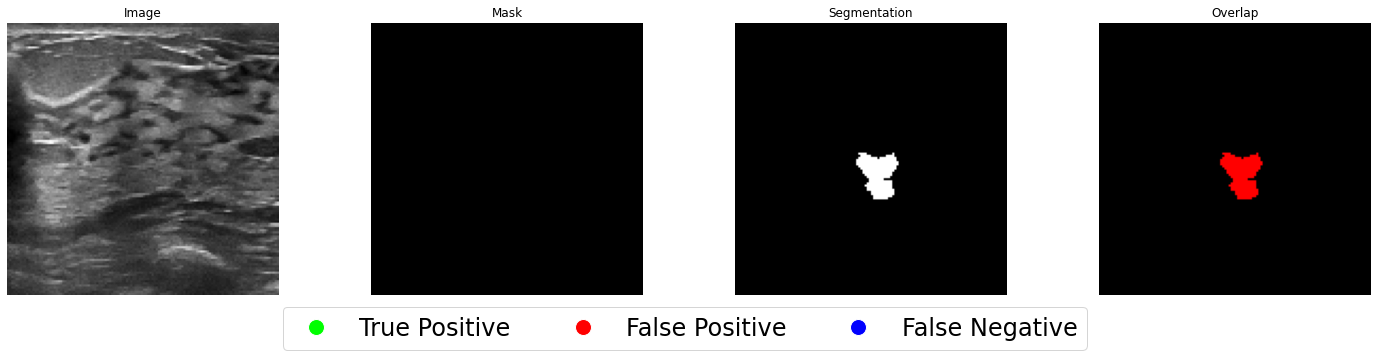

Patient: 87	DICE: Class predicted: 2		 1		 0 pixeles labelled


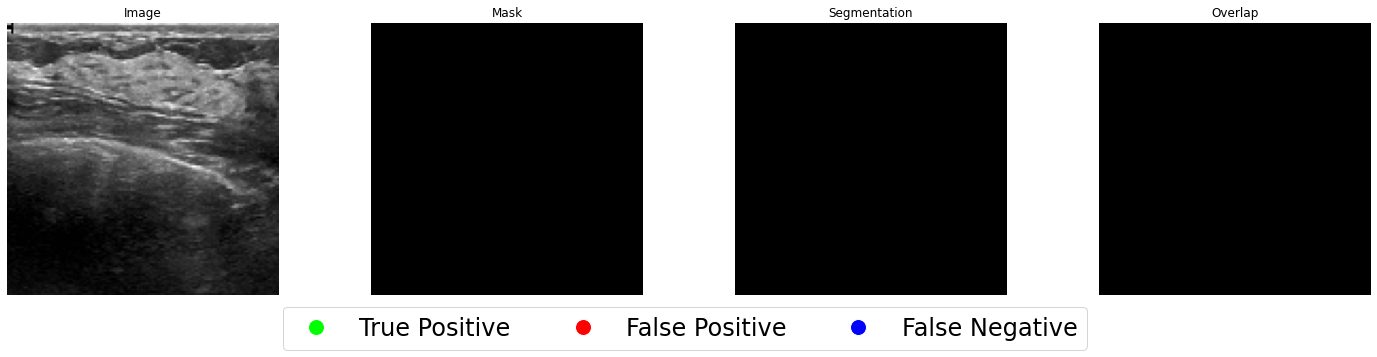

Patient: 91	DICE: Class predicted: 2		 1		 0 pixeles labelled


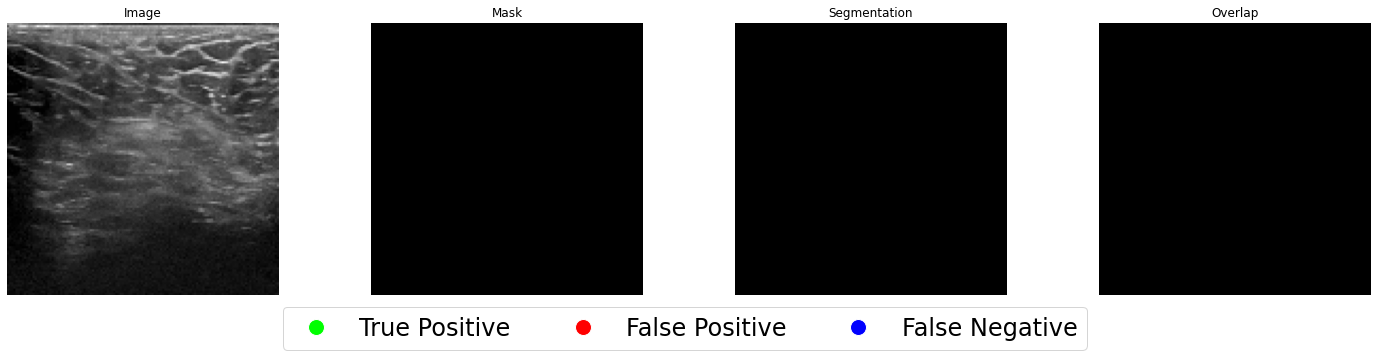

DICE: 0.5625+-0.49607837082461076


In [57]:
DICEs= []
for i in normal_seg_paths:
    patient_id = i.split("/")[-1].split("_")[1]
    seg = cv2.imread(i, 0)
    pixels_labelled = count_pixels(seg).get(255, 0)
#     if pixels_labelled <=40:
#         seg[seg == 255] = 0
        
    img = cv2.imread(f"{images_path}/normal_id_{patient_id}.png", 0)
    mask = cv2.imread(f"{masks_path}/normal_id_{patient_id}_mask.png", 0)
    seg = postprocess_binary_segmentation(seg, 10)
    DICE = dice_score_from_numpy(mask, seg)
    class_pred = cls[(cls.patient_id == int(patient_id)) & (cls.ground_truth == 2)]["predicted_label"].values[0]
    
    print(f"Patient: {patient_id}\tDICE: Class predicted: {class_pred}\t\t {DICE}\t\t {pixels_labelled} pixeles labelled")
    
    plot_overlapping(img, mask, seg)
    DICEs.append(DICE)

print(f"DICE: {np.mean(DICEs)}+-{np.std(DICEs)}")

In [58]:
a = pd.read_csv("/home/carlos/Documentos/proyectos/breast_cancer/Datasets/Dataset_BUSI_with_GT_postprocessed_128_uniques/mapping.csv")

In [61]:
round(a['class'].value_counts(normalize=True), 2)

benign      0.4900
malignant   0.3600
normal      0.1400
Name: class, dtype: float64